# section 1

In [107]:
import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install matplotlib.pyplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
# df22 = pd.read_csv(r'C:\Users\rafae\OneDrive\Documentos\prog\coding\modelagem-estatistica\MICRODADOS_ENEM_2022.csv',  sep=';',encoding='iso-8859-1', usecols=["NU_ANO","TP_FAIXA_ETARIA","TP_SEXO",
#                                                                                                                           "TP_COR_RACA","TP_ST_CONCLUSAO", 'TP_ANO_CONCLUIU', "TP_ESCOLA",
#                                                                                                                           "NO_MUNICIPIO_PROVA","SG_UF_PROVA",
#                                                                                                                           "NU_NOTA_COMP3", "NU_NOTA_REDACAO",
#                                                                                                                           "Q001","Q002","Q003","Q004","Q005","Q006","Q022","Q025"]).dropna()

In [109]:
# computador fgv
df22 = pd.read_csv(r'C:\Users\b47244\Documents\Modelagem-Estatistica\dados\MICRODADOS_ENEM_2022.csv',  sep=';',encoding='iso-8859-1', usecols=["NU_ANO","TP_FAIXA_ETARIA","TP_SEXO",
                                                                                                                          "TP_COR_RACA","TP_ST_CONCLUSAO", 'TP_ANO_CONCLUIU', "TP_ESCOLA",
                                                                                                                          "NO_MUNICIPIO_PROVA","SG_UF_PROVA",
                                                                                                                          "NU_NOTA_COMP3", "NU_NOTA_REDACAO",
                                                                                                                          "Q001","Q002","Q003","Q004","Q005","Q006","Q022","Q025"]).dropna()

Agora, iremos tratar esses dados:

In [110]:
# apenas quem nao zerou a competencia 3
df22 = df22[df22['NU_NOTA_COMP3']!=0]

# apenas quem nao zerou a competencia 3
df22 = df22[df22['NU_NOTA_REDACAO']!=0]

In [111]:
# Masculino = 1 e Feminino = 0
df22['TP_SEXO'] = df22['TP_SEXO'].replace('M',1).replace('F',0)

C:\Users\b47244\AppData\Local\Temp\ipykernel_11160\1660209483.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df22['TP_SEXO'] = df22['TP_SEXO'].replace('M',1).replace('F',0)


In [112]:
# apenas quem declarou a etnia e criar dummies
df22 = df22[df22['TP_COR_RACA']!=0]

print(len(df22))
print(df22['TP_COR_RACA'].value_counts())

df22 = pd.get_dummies(df22, columns=['TP_COR_RACA'], prefix='TP_COR_RACA')

TP_COR_RACA
1    1044990
3     964942
2     257575
4      44067
5      11132
Name: count, dtype: int64


In [113]:
# Ao invés de usar o nome dos municipios, iremos verificar se o aluno fez a prova em uma capital
capitais = [
    'Rio Branco', 'Maceió', 'Macapá', 'Manaus', 'Salvador', 'Fortaleza', 
    'Brasília', 'Vitória', 'Goiânia', 'São Luís', 'Cuiabá', 'Campo Grande', 
    'Belo Horizonte', 'Belém', 'João Pessoa', 'Curitiba', 'Recife', 
    'Teresina', 'Rio de Janeiro', 'Natal', 'Porto Alegre', 'Porto Velho', 
    'Boa Vista', 'Florianópolis', 'São Paulo', 'Aracaju', 'Palmas'
]

df22['CAPITAL'] = df22['NO_MUNICIPIO_PROVA'].apply(lambda x: 1 if x in capitais else 0)
df22 = df22.drop('NO_MUNICIPIO_PROVA',axis=1)

print(df22[df22['TP_COR_RACA_5']== True]['CAPITAL'].value_counts())
print(df22[df22['TP_COR_RACA_5']== False]['CAPITAL'].value_counts())

CAPITAL
0    8590
1    2542
Name: count, dtype: int64
CAPITAL
0    1618555
1     693019
Name: count, dtype: int64


In [114]:
# entendendo onde os indios estao
print(df22[df22['TP_COR_RACA_5']== True]['SG_UF_PROVA'].value_counts())
print(df22['TP_SEXO'].value_counts())

SG_UF_PROVA
PE    1589
AM    1324
BA    1055
SP     878
CE     614
PB     608
MS     602
PA     589
MG     472
RJ     395
GO     330
MA     293
AL     289
RR     244
PI     244
SE     191
RN     164
ES     159
MT     155
PR     151
RO     145
DF     118
SC     115
RS     112
TO     106
AP      95
AC      95
Name: count, dtype: int64
TP_SEXO
0    1429434
1     893272
Name: count, dtype: int64


In [115]:
# %%script false 
# iremos usar dummies das regiões do país ao inves do nome dos estados para diminuir o numero de variaveis no modelo

regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['GO', 'MT', 'MS', 'DF'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

def mapear_regiao(uf):
    for regiao, ufs in regioes.items():
        if uf in ufs:
            return regiao
    return None
df22['Regiao'] = df22['SG_UF_PROVA'].apply(mapear_regiao)

df22 = df22.drop('SG_UF_PROVA',axis=1)
df22 = pd.get_dummies(df22, columns=['Regiao'], prefix='Regiao')

print(df22[df22['TP_COR_RACA_5']== True].loc[:,['Regiao_Centro-Oeste', 'Regiao_Nordeste', 'Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul']].sum())

Regiao_Centro-Oeste    1205
Regiao_Nordeste        5047
Regiao_Norte           2598
Regiao_Sudeste         1904
Regiao_Sul              378
dtype: int64


In [116]:
# tava testando fazer o matching antes
%%script false
# Filtrar os dados para incluir apenas os indígenas e os não indígenas
dados_indigenas = df22[df22['TP_COR_RACA_5'] == True]
dados_nao_indigenas = df22[df22['TP_COR_RACA_5'] == False]

# Selecionar as colunas relevantes para o matching
colunas_relevantes = ["TP_FAIXA_ETARIA", "TP_SEXO",
                    "TP_ST_CONCLUSAO", 'TP_ANO_CONCLUIU', "TP_ESCOLA",
                    "CAPITAL",'Regiao_Centro-Oeste', 'Regiao_Nordeste', 'Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul',
                    "Q001","Q002","Q003","Q004","Q005","Q006","Q022","Q025"]

# fica mais facil encontrar os matches se tivermos uma matriz dos indigenas sem "dados repetidos", ou seja, 
# pessoas diferentes, mas com as mesma respostas no questionario
matriz_indigenas_unica = dados_indigenas[colunas_relevantes].drop_duplicates()

# encontrar os matches
matches = pd.merge(matriz_indigenas_unica, dados_nao_indigenas, on=colunas_relevantes, how='inner')

print(f"Número de matches encontrados: {len(matches)}")

# tem mais pardo
print(matches.loc[:,['TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5']].sum())

df22 = pd.concat([dados_indigenas, matches], ignore_index=True)

UsageError: Line magic function `%%script` not found.


In [117]:
# Q005 é sobre quantas pessoas moram na família e Q006 é sobre a renda mensal da familia (soma de cada um dos membros).
# Criaremos uma coluna que contabilize a renda per capita familiar

# Dicionário com as faixas salariais e seus valores numéricos
faixas_salarial = {
    'A': 0,
    'B': 1212,
    'C': 1818,
    'D': 2424,
    'E': 3030,
    'F': 3636,
    'G': 4848,
    'H': 6060,
    'I': 7272,
    'J': 8484,
    'K': 9696,
    'L': 10908,
    'M': 12120,
    'N': 14544,
    'O': 18180,
    'P': 24240,
    'Q': 24241  # Considerando acima de 24240
}

nova_faixa = {
    1: 0,
    2: 303,
    3: 606,
    4: 909,
    5: 1212,
    6: 1818,
    7: 2424,
    8: 3030,
    9: 3636,
    10: 4848,
    11: 6060,
    12: 9090,
    13: 9091, # valores acima de 9091 por pessoa
}

# Função para calcular a renda por pessoa e encontrar a faixa salarial correspondente
def calcular_faixa_renda_por_pessoa(pessoas, renda_familia):
    renda_total = faixas_salarial[renda_familia]
    renda_por_pessoa = renda_total / pessoas
    
    # Encontrar a faixa salarial correspondente
    for faixa, valor in nova_faixa.items():
        if renda_por_pessoa <= valor:
            return faixa
    return 13  # Para renda acima de R$ 9091,00 por pessoa

# Aplicar a função para calcular a faixa salarial da renda por pessoa
df22['faixa_per_capita_fam'] = df22.apply(lambda row: calcular_faixa_renda_por_pessoa(row['Q005'], row['Q006']), axis=1)

print(df22['Q005'].value_counts())
print(df22['Q006'].value_counts())
print(df22['faixa_per_capita_fam'].value_counts())
print('-------------')
print(df22[df22['TP_COR_RACA_5']== True]['Q005'].value_counts())
print(df22[df22['TP_COR_RACA_5']== True]['Q006'].value_counts())
print(df22[df22['TP_COR_RACA_5']== True]['faixa_per_capita_fam'].value_counts())

df22 = df22.drop('Q005',axis=1)
df22 = df22.drop('Q006',axis=1)


Q005
4     813279
3     655806
5     346736
2     284065
6     109867
1      47624
7      38268
8      15370
9       5673
10      3212
11      1092
12       758
13       314
14       184
20       161
15       153
16        52
17        42
18        26
19        24
Name: count, dtype: int64
Q006
B    612540
C    367218
D    275962
E    194344
H    146567
G    146110
F    115079
A    113018
I     62751
J     44517
L     42028
Q     40228
M     39791
O     32309
K     31672
P     29856
N     28716
Name: count, dtype: int64
faixa_per_capita_fam
3     741756
2     365691
4     276818
5     255442
6     193018
7     129508
1     113018
8      68878
10     48284
9      45525
12     41907
11     36754
13      6107
Name: count, dtype: int64
-------------
Q005
4     3101
3     2456
5     2101
2     1119
6      985
7      510
1      305
8      261
9      123
10      94
11      23
12      21
15       9
13       8
14       7
20       6
16       2
17       1
Name: count, dtype: int64
Q006
B    4913


In [118]:
# print(df22)
print(df22.loc[:,['TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5']].sum())
print(df22['Q001'].value_counts())
print(df22['Q002'].value_counts())

# escolaridade da mae tende ser maior

TP_COR_RACA_1    1044990
TP_COR_RACA_2     257575
TP_COR_RACA_3     964942
TP_COR_RACA_4      44067
TP_COR_RACA_5      11132
dtype: int64
Q001
E    718570
B    344765
C    287878
D    257098
F    251994
G    194781
H    194713
A     72907
Name: count, dtype: int64
Q002
E    846182
F    330399
G    324349
D    258832
B    233878
C    228021
H     57246
A     43799
Name: count, dtype: int64


In [119]:
# apenas quem sabe a escolaridade do pai OU da mãe
df22 = df22.loc[(df22['Q001'] != 'H') | (df22['Q002'] != 'H')]

# apenas quem sabe a profissão do pai OU da mãe
df22 = df22[~((df22['Q003'] == 'F') & (df22['Q004'] == 'F'))]

# Aplicar a função de conversão apenas para as colunas com letras
def letra_num(letra):
    return ord(letra) - ord('A')

for col in ['Q001', 'Q002', 'Q003', 'Q004', 'Q022', 'Q025']:
    df22[col] = df22[col].apply(letra_num)

# substituimos os valores de quem não sabe para não alterar o max
df22[['Q001', 'Q002']] = df22[['Q001', 'Q002']].replace(7,-1)
df22[['Q003', 'Q004']] = df22[['Q003', 'Q004']].replace(5,-1)

# escolhemos o responsável com maior escolaridade e o com "maior emprego"
df22['responsavel_maior_escolaridade'] = df22[['Q001', 'Q002']].max(axis=1)
df22['responsavel_maior_emprego'] = df22[['Q003', 'Q004']].max(axis=1)

df22= df22.drop(['Q001', 'Q002', 'Q003', 'Q004'],axis=1)


In [120]:
# print(df22)
print(df22.loc[:,['TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5']].sum())
print(df22['responsavel_maior_emprego'].value_counts())
print(df22['responsavel_maior_escolaridade'].value_counts())

TP_COR_RACA_1    1009981
TP_COR_RACA_2     245781
TP_COR_RACA_3     918045
TP_COR_RACA_4      42011
TP_COR_RACA_5      10447
dtype: int64
responsavel_maior_emprego
3    757550
1    510354
2    440855
4    268057
0    249449
Name: count, dtype: int64
responsavel_maior_escolaridade
4    839881
6    410799
5    371504
3    222215
2    181750
1    175335
0     24781
Name: count, dtype: int64


# section 2

Analisando os dados, percebi que apenas quem irá concluir o EM em 2022 que informou o tipo de escola que estudou (pública ou privada). Por isso, criei um segundo dataframe para analisar apenas esse grupo. No primeiro dataframe analiasaremos os dois grupos e poderemos ver como o ano de conclusão influencia no nota final.

In [121]:
# Apenas quem irá concluir o EM no ano da prova que informou o tipo de escola. 
# Por isso nesse df analisaremos o impacto do tipo de escola na nota final.
# pública = 0 e privada = 1
df22_2 = df22.copy()
df22_2 = df22[df22['TP_ST_CONCLUSAO']==2]
df22_2.loc[:, 'TP_ESCOLA'] = df22['TP_ESCOLA'] - 2

print(df22_2['TP_ESCOLA'].value_counts())

TP_ESCOLA
0    691724
1    190885
Name: count, dtype: int64


In [122]:
# Pessoas que já se formaram nao identificaram o tipo de escola que estudaram (se publica ou privada).
# Logo criamos um df para podermos verificar se a quantidade de tempo desde que ela concluiu o EM influenciou no seu resultado

df22 = df22[(df22['TP_ST_CONCLUSAO'] == 1) | (df22['TP_ST_CONCLUSAO'] == 2)]

# excluimos quem já concluiu o EM e não informou o ano que concluiu o EM
df22 = df22.drop(df22[(df22['TP_ST_CONCLUSAO'] == 1) & (df22['TP_ANO_CONCLUIU'] == 0)].index)

In [123]:
# removemos a coluna do status de conclusao no DFs 1 e 2
df22 = df22.drop('TP_ST_CONCLUSAO',axis=1)
df22_2 = df22_2.drop('TP_ST_CONCLUSAO',axis=1)

In [124]:
# removemos a coluna de ano de conclusão do DF 2
df22_2 = df22_2.drop('TP_ANO_CONCLUIU',axis=1)

In [125]:
# removemos a coluna do tipo de escola do DF 1
df22 = df22.drop('TP_ESCOLA',axis=1)


In [126]:
# Reiniciar os índices
df22.reset_index(drop=True, inplace=True)
df22_2.reset_index(drop=True, inplace=True)

# trocar booleanos
df22 = df22.astype(int)
df22_2 = df22_2.astype(int)

Agora, vamos fazer o matching. É esperado que reduza vieses, uma vez que igualamos as situações socieconômicas. As correlações entre variáveis socioeconômicas e notas de redação devem ser mais próximas entre indígenas e não indígenas após o matching, refletindo a equiparação das condições de base (de fato foi o observado)

In [127]:
# %%script false
# Filtrar os dados para incluir apenas os indígenas e os não indígenas
dados_indigenas = df22[df22['TP_COR_RACA_5'] == True]
dados_nao_indigenas = df22[df22['TP_COR_RACA_5'] == False]

# Selecionar as colunas relevantes para o matching
colunas_relevantes = [
    'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ANO_CONCLUIU',
    'Q022', 'Q025', 'faixa_per_capita_fam',
    'responsavel_maior_escolaridade', 'responsavel_maior_emprego', 
    'CAPITAL', 'Regiao_Centro-Oeste', 'Regiao_Nordeste', 'Regiao_Norte',
    'Regiao_Sudeste', 'Regiao_Sul'
]

# fica mais facil encontrar os matches se tivermos uma matriz dos indigenas sem "dados repetidos", ou seja, 
# pessoas diferentes, mas com as mesma respostas no questionario
matriz_indigenas_unica = dados_indigenas[colunas_relevantes].drop_duplicates()

# encontrar os matches
matches = pd.merge(matriz_indigenas_unica, dados_nao_indigenas, on=colunas_relevantes, how='inner')

print(f"Número de matches encontrados: {len(matches)}")

# tem mais pardo
print(matches.loc[:,['TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5']].sum())

df22_sem_match = df22.copy()
df22 = pd.concat([dados_indigenas, matches], ignore_index=True)

Número de matches encontrados: 341332
TP_COR_RACA_1    129142
TP_COR_RACA_2     41319
TP_COR_RACA_3    164310
TP_COR_RACA_4      6561
TP_COR_RACA_5         0
dtype: int64


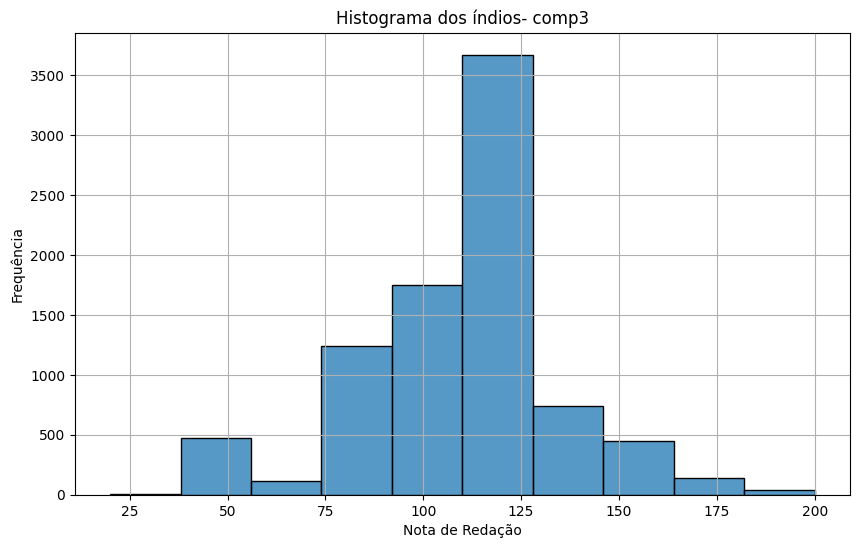

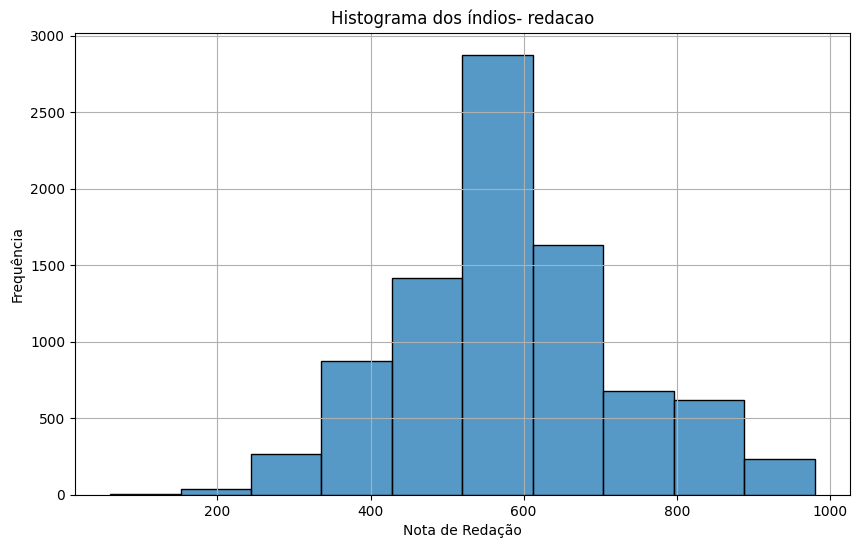

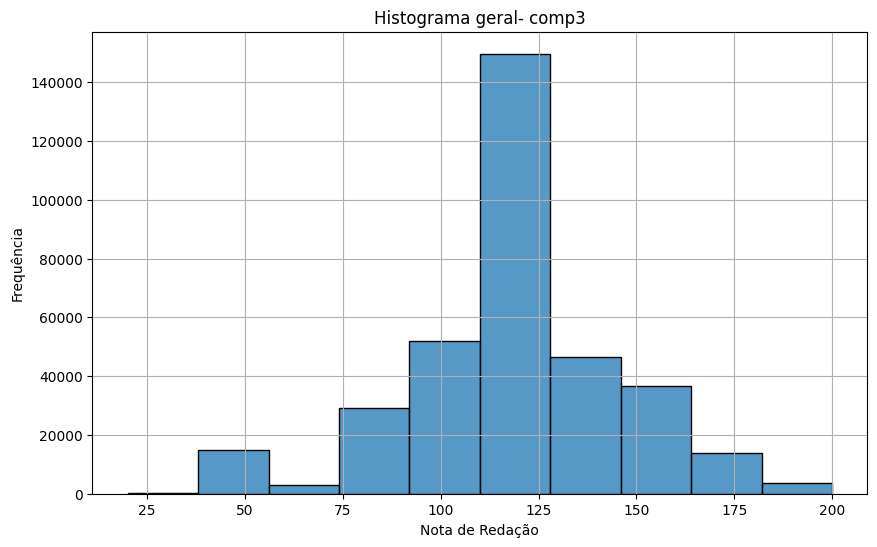

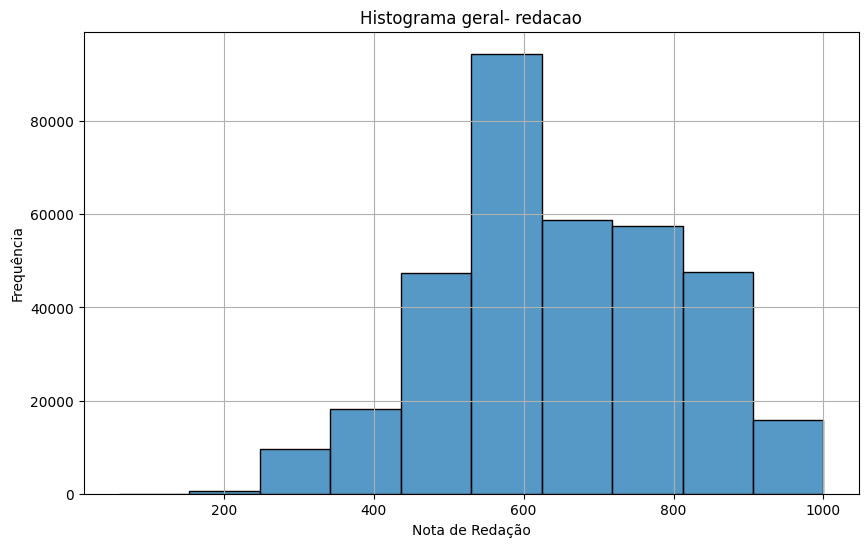

In [128]:
# apenas vendo se as notas seguem a normal

def nota_grupo(dados_grupo, info, nota):
    plt.figure(figsize=(10, 6))
    # sns.kdeplot(dados_grupo['NU_NOTA_COMP3'], bw_adjust=2)
    sns.histplot(dados_grupo[nota], bins=10, kde=False)
    plt.title(info)
    plt.xlabel('Nota de Redação')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

nota_grupo(df22[df22['TP_COR_RACA_5']== True], 'Histograma dos índios- comp3', 'NU_NOTA_COMP3')
nota_grupo(df22[df22['TP_COR_RACA_5']== True], 'Histograma dos índios- redacao', 'NU_NOTA_REDACAO')
nota_grupo(df22, 'Histograma geral- comp3', 'NU_NOTA_COMP3')
nota_grupo(df22, 'Histograma geral- redacao', 'NU_NOTA_REDACAO')

C:\Users\b47244\AppData\Local\Temp\ipykernel_11160\3615300966.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df22[df22['TP_COR_RACA_5']==True]['NU_NOTA_REDACAO'], color='blue', shade=True, label='Índios')
C:\Users\b47244\AppData\Local\Temp\ipykernel_11160\3615300966.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df22[df22['TP_COR_RACA_5']==False]['NU_NOTA_REDACAO'], color='red', shade=True, label='nao índios', bw_adjust=1.5)


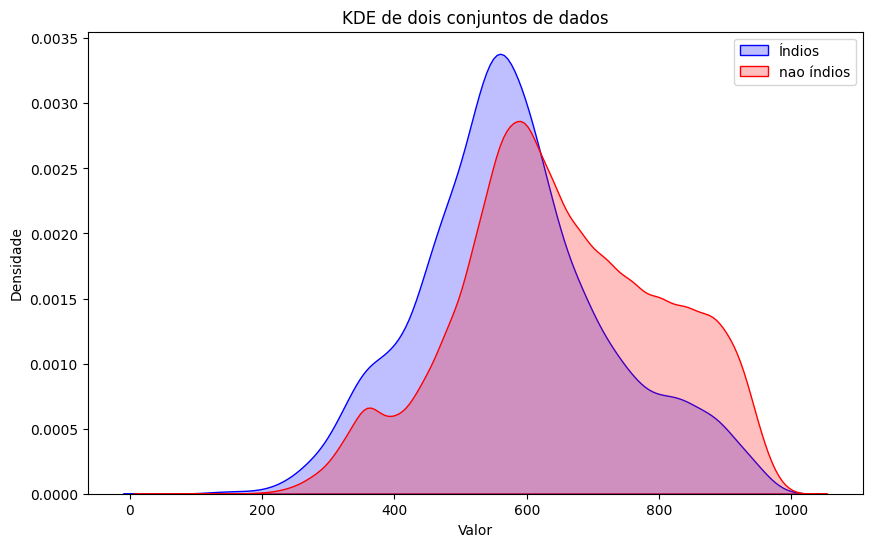

341332
8634


In [129]:
# Criar o gráfico KDE com Seaborn
plt.figure(figsize=(10, 6))

# KDE para o primeiro conjunto de dados
sns.kdeplot(df22[df22['TP_COR_RACA_5']==True]['NU_NOTA_REDACAO'], color='blue', shade=True, label='Índios')

# KDE para o segundo conjunto de dados
sns.kdeplot(df22[df22['TP_COR_RACA_5']==False]['NU_NOTA_REDACAO'], color='red', shade=True, label='nao índios', bw_adjust=1.5)

# Adicionar título e rótulos
plt.title('KDE de dois conjuntos de dados')
plt.xlabel('Valor')
plt.ylabel('Densidade')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

print(len(df22[df22['TP_COR_RACA_5']==False]))
print(len(df22[df22['TP_COR_RACA_5']==True]))

C:\Users\b47244\AppData\Local\Temp\ipykernel_11160\4181574789.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df22[df22[coluna]==True]['NU_NOTA_REDACAO'], color=cor, shade=True, label=label, bw_adjust=1.5)
C:\Users\b47244\AppData\Local\Temp\ipykernel_11160\4181574789.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df22[df22[coluna]==True]['NU_NOTA_REDACAO'], color=cor, shade=True, label=label, bw_adjust=1.5)
C:\Users\b47244\AppData\Local\Temp\ipykernel_11160\4181574789.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df22[df22[coluna]==True]['NU_NOTA_REDACAO'], color=cor, shade=True, label=label, bw_adjust=

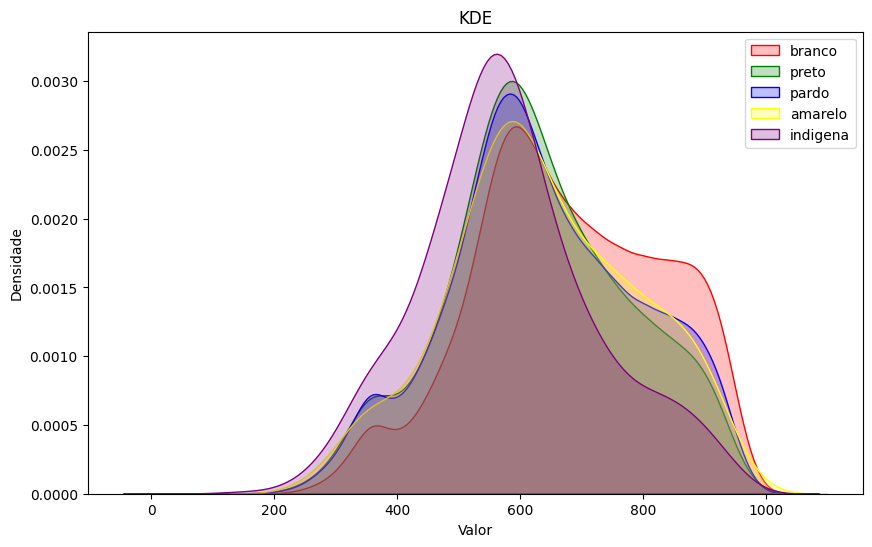

[129142, 41319, 164310, 6561, 8634]


In [130]:
# Definindo as cores e labels para cada grupo
cores = ['red', 'green', 'blue', 'yellow', 'purple']
labels = ['branco', 'preto', 'pardo', 'amarelo', 'indigena']
colunas_raca = ['TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5']

# Lista para armazenar os comprimentos
lengths = []

# Criar o gráfico KDE com Seaborn
plt.figure(figsize=(10, 6))

# Loop através das colunas de raça
for cor, label, coluna in zip(cores, labels, colunas_raca):
    sns.kdeplot(df22[df22[coluna]==True]['NU_NOTA_REDACAO'], color=cor, shade=True, label=label, bw_adjust=1.5)
    lengths.append(len(df22[df22[coluna]==True]['NU_NOTA_REDACAO']))

# Adicionar título e rótulos
plt.title('KDE')
plt.xlabel('Valor')
plt.ylabel('Densidade')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

print(lengths)

A análise das correlações ajuda na regressão linear de várias maneiras:

*Identificação de Variáveis Relevantes*: Ao examinar as correlações entre as variáveis independentes e a variável dependente, você pode identificar quais variáveis têm uma relação mais forte com a variável de interesse. Isso ajuda na seleção das variáveis a serem incluídas no modelo de regressão.

*Prevenção de Multicolinearidade*: A análise das correlações entre as variáveis independentes pode ajudar a identificar a multicolinearidade, que ocorre quando duas ou mais variáveis independentes estão altamente correlacionadas entre si. A multicolinearidade pode prejudicar a interpretação dos coeficientes de regressão e a precisão das previsões.

*Validação de Suposiçõe*s: A regressão linear assume certas condições, como linearidade, homocedasticidade e independência dos erros. Ao examinar as correlações, você pode verificar se essas suposições estão sendo violadas. Por exemplo, se houver uma correlação não linear entre as variáveis, pode ser necessário considerar transformações das variáveis.

*Interpretação dos Coeficientes*: As correlações podem fornecer insights sobre a direção e a magnitude das associações entre as variáveis independentes e a variável dependente. Isso ajuda na interpretação dos coeficientes de regressão no modelo final.

Em resumo, a análise das correlações é uma etapa importante no processo de modelagem de regressão linear, pois ajuda a selecionar variáveis relevantes, evitar problemas como multicolinearidade e validar suposições do modelo. Isso leva a um modelo de regressão mais robusto e confiável.

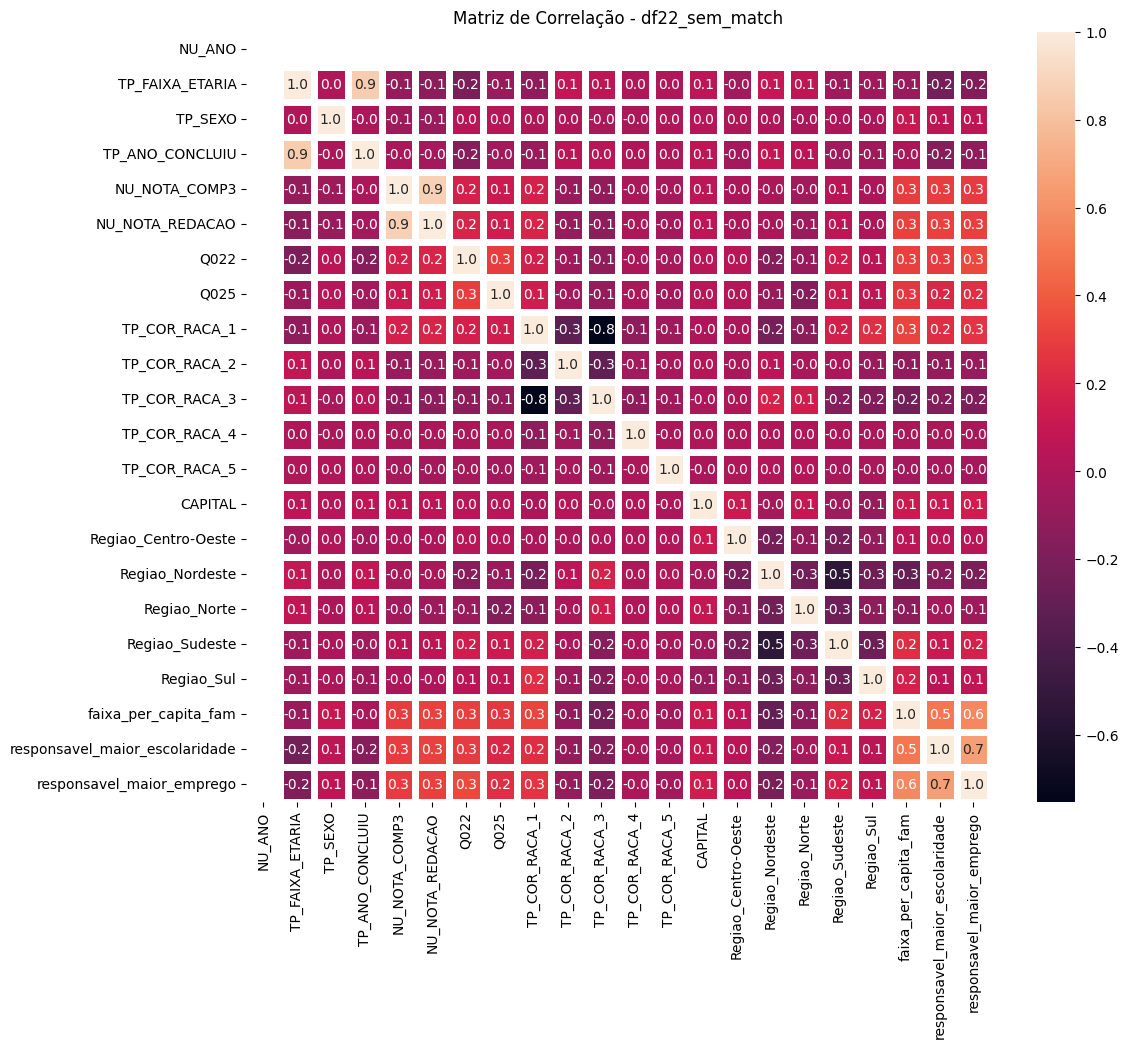

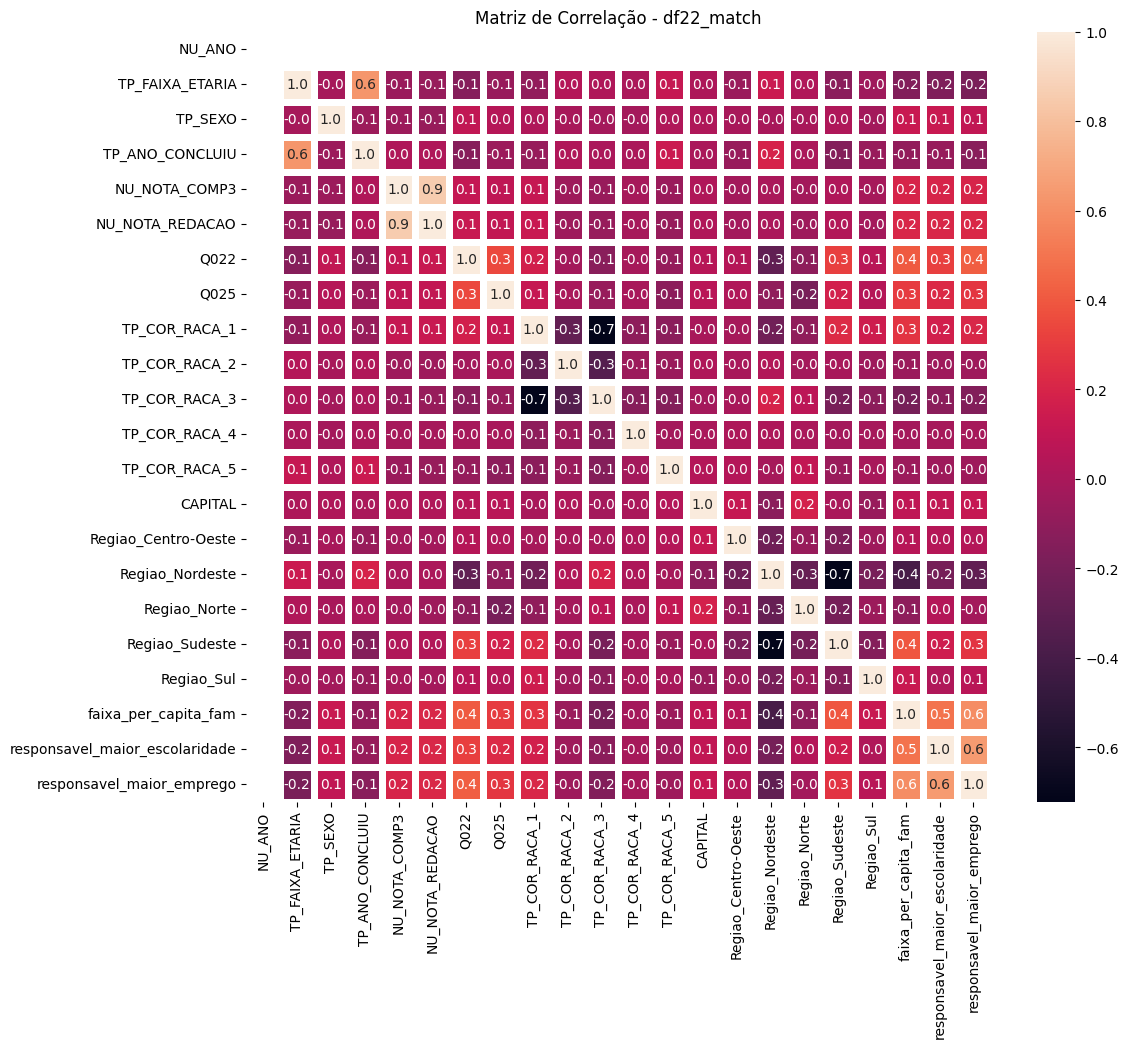

In [131]:
# Aumente o tamanho da figura
plt.figure(figsize=(12, 10))

# Plot da matriz de correlação para df22
plot1 = sns.heatmap(df22_sem_match.corr(method='spearman'), annot=True, fmt="0.1f", linewidths=5)
plt.title('Matriz de Correlação - df22_sem_match')

# Exibir o plot1
plt.show()

# Aumente o tamanho da próxima figura
plt.figure(figsize=(12, 10))

# Plot da matriz de correlação para df22_match
plot2 = sns.heatmap(df22.corr(method='spearman'), annot=True, fmt="0.1f", linewidths=5)
plt.title('Matriz de Correlação - df22_match')

# Exibir o plot2
plt.show()

In [132]:
import pandas as pd
!{sys.executable} -m pip install sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Supondo que você tenha um DataFrame chamado df com as suas variáveis independentes e dependentes

# Separar as variáveis independentes (X) da variável dependente (y)
X = df22[['variavel_independente_1', 'variavel_independente_2', ...]]
y = df22['variavel_dependente']

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo de regressão linear
modelo_regressao = LinearRegression()

# Treinar o modelo com os dados de treinamento
modelo_regressao.fit(X_train, y_train)

# Avaliar o modelo utilizando os dados de teste
score = modelo_regressao.score(X_test, y_test)

# Coeficientes da regressão
coeficientes = modelo_regressao.coef_

# Intercepto da regressão
intercepto = modelo_regressao.intercept_

# Imprimir os coeficientes
print("Coeficientes da regressão:")
for i, coeficiente in enumerate(coeficientes):
    print(f"Coeficiente {i+1}: {coeficiente}")

# Imprimir o intercepto
print("Intercepto da regressão:", intercepto)


'c:\Program' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


ModuleNotFoundError: No module named 'sklearn'